In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import binom
import statsmodels.api as sm

## 2

In [2]:
for n in [5,10,20,30,40,500]:
    iqr = []
    for i in range(100):
        x = np.random.uniform(8,10,n)
        q3, q1 = np.percentile(x,[75, 25])
        iqr.append(q3 - q1)
    print(f'for sample size {n} iqrs distribution mean is -- {np.mean(iqr)} and variance is -- {np.var(iqr)}')

for sample size 5 iqrs distribution mean is -- 0.6407870927556252 and variance is -- 0.12899128783837963
for sample size 10 iqrs distribution mean is -- 0.8663180770387945 and variance is -- 0.07051652918289675
for sample size 20 iqrs distribution mean is -- 0.883520648317565 and variance is -- 0.03838265837609444
for sample size 30 iqrs distribution mean is -- 0.9248543312900752 and variance is -- 0.027282029564847345
for sample size 40 iqrs distribution mean is -- 0.9349054046876667 and variance is -- 0.016028881728348383
for sample size 500 iqrs distribution mean is -- 0.9913194702871186 and variance is -- 0.002403565262598242


 As we can see the variance is decreasing

## 3

In [3]:
def plt_hist(n):
    dist = []
    for i in range(1000):
        sample = np.random.lognormal(3,1,n)
        dist.append(np.mean(sample))
    plt.hist(dist,bins = 20)

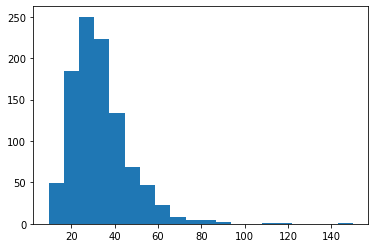

In [4]:
plt_hist(10)

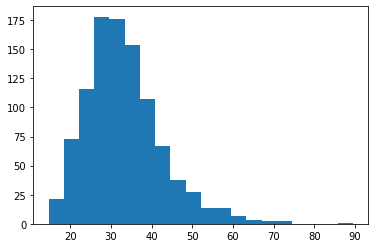

In [5]:
plt_hist(20)

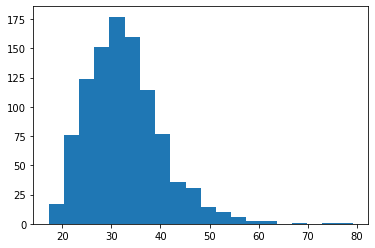

In [6]:
plt_hist(30)

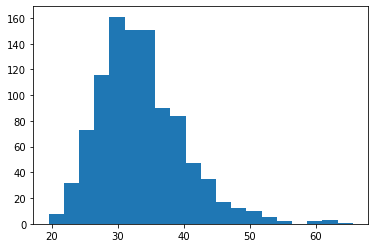

In [7]:
plt_hist(50)

## 5

In [8]:
def qq_plot(np_dist, dist='norm'):
    np_dist = np.sort(np_dist)
    if(len(np_dist))>=100:
        x = np.linspace(0,1,100)
        quant = np.linspace(0,len(np_dist)-1,100,dtype=int)
        plt.figure(figsize=(10,10))
        np_quant = np.zeros(len(quant))
        for i in range(len(quant)):
            np_quant[i]=np_dist[quant[i]]
    else:
        n=len(np_dist)
        x = np.linspace(0,1,n)
        quant = np.zeros(n)
        np_quant = np.zeros(n)
        np_quant = np_dist
        for i in range(n):
            quant[i] = int(100*(i+0.5)/n)
        print("percentiles ---",quant)
    if dist =='binom':
        checker = st.binom.ppf(x, 10, 0.3)
    else:
        checker = st.norm.ppf(x, loc = 0, scale = 1)
    m, b = np.polyfit(checker[1:-2], np_quant[1:-2], 1) #m = slope, b=intercept
    plt.plot(checker[1:-2], m*checker[1:-2] + b, color='pink')
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.plot(checker,np_quant,'bo')

In [9]:
def function(sample_size):
    cor = []
    for n in range(10000):
        x = np.random.uniform(0,1,sample_size)
        y = np.random.uniform(0,1,sample_size)
        corelation = np.corrcoef(x, y)[0][1]
        cor.append(corelation)
    return np.array(cor)

In [10]:
np_cor = function(20)

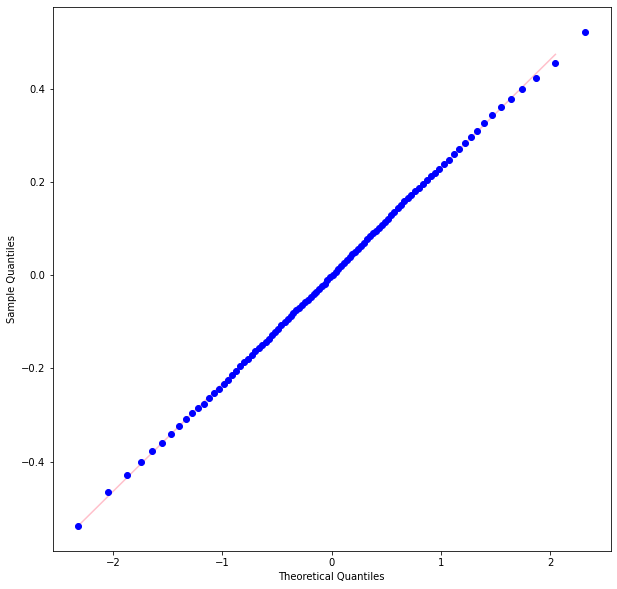

In [11]:
qq_plot(np_cor)

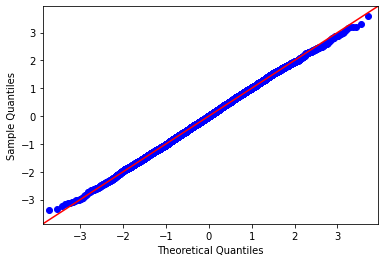

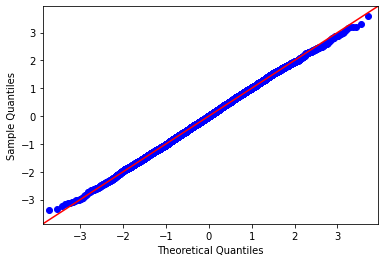

In [12]:
sm.qqplot(np_cor,line='45',fit=True,dist=st.norm)

In [13]:
b = np.where((np_cor>-0.3) & (np_cor<0.3))
prob = np_cor[b]
pr = len(prob)/len(np_cor)
print(pr)

0.8067


In [14]:
st.norm.cdf(0.3)-st.norm.cdf(-0.3)

0.23582284437790518

In [15]:
#st_cor = (np_cor-np.mean(np_cor))/np.var(np_cor)

In [16]:
from sklearn import preprocessing
standard = preprocessing.scale(np_cor)

In [17]:
print(f'5th percentile {np.percentile(np_cor, 5)} 95th percentile {np.percentile(np_cor, 95)}')
print(f'2.5th percentile {np.percentile(np_cor, 2.5)} 97.5th percentile {np.percentile(np_cor, 97.5)}')

5th percentile -0.37789375471099756 95th percentile 0.37776017406183227
2.5th percentile -0.4440083800833627 97.5th percentile 0.43726768364104407


5.5 Change the sample size from 20 to 10 and perform the steps from 1 to 4. Try the following sample sizes too: 50, 100, 1000.

0.6021
5th percentile -0.5535840671609388 95th percentile 0.5550013129286633
2.5th percentile -0.6404943940063145 97.5th percentile 0.638366400967512


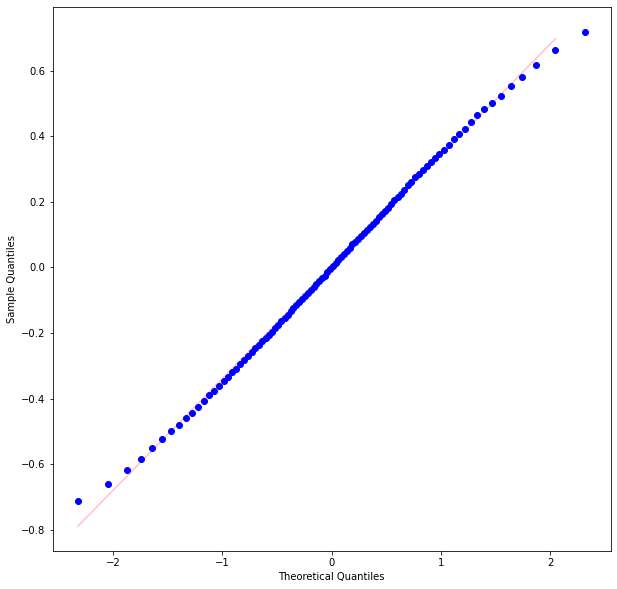

In [18]:
# n = 10
np_cor = function(10)
qq_plot(np_cor)
b = np.where((np_cor>-0.3) & (np_cor<0.3))
prob = np_cor[b]
pr = len(prob)/len(np_cor)
print(pr)
print(f'5th percentile {np.percentile(np_cor, 5)} 95th percentile {np.percentile(np_cor, 95)}')
print(f'2.5th percentile {np.percentile(np_cor, 2.5)} 97.5th percentile {np.percentile(np_cor, 97.5)}')

0.9969
5th percentile -0.16906755554867514 95th percentile 0.16802573698677736
2.5th percentile -0.2029054992636574 97.5th percentile 0.2002066673231004


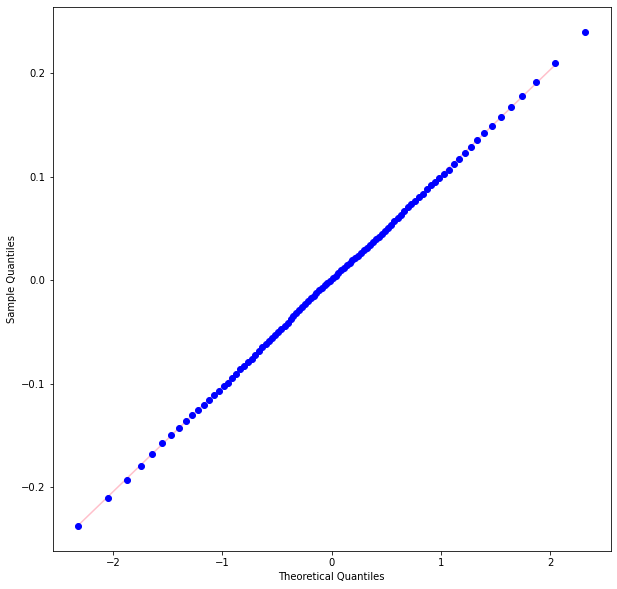

In [19]:
# n = 100
np_cor = function(100)
qq_plot(np_cor)
b = np.where((np_cor>-0.3) & (np_cor<0.3))
prob = np_cor[b]
pr = len(prob)/len(np_cor)
print(pr)
print(f'5th percentile {np.percentile(np_cor, 5)} 95th percentile {np.percentile(np_cor, 95)}')
print(f'2.5th percentile {np.percentile(np_cor, 2.5)} 97.5th percentile {np.percentile(np_cor, 97.5)}')